## Jesus Rodrigo Colina Nunez




## Data Understanding

Let's first load the data and understand the attributes meanings, shape of the dataset etc.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [57]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [74]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import poisson
from scipy.stats import binom

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [23]:
# Load Files

df_AP = pd.read_csv('Annual_Population_Change.csv') 

df2_EP = pd.read_csv('Estimated_Population_from_2006.csv') #YES

#df3_EP2011 = pd.read_csv('Estimated_Population_from_2011.csv')  #MAYBE



# EDA from our 2 files

In [3]:
df_1=df.copy() 

In [6]:
df_AP.shape

# Get the shape of the data (rows and columns)

(584, 5)

In [7]:
df_AP.columns 

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

In [8]:
 # Get the data types of each column
df_AP.dtypes

STATISTIC Label     object
Year                 int64
Component           object
UNIT                object
VALUE              float64
dtype: object

In [9]:
df_AP.describe() # Get some descriptive statistics

,Year,VALUE
count,584.000000,440.000000
mean,1987.000000,633.262273
std,21.089371,1378.671718
min,1951.000000,-58.000000
25%,1969.000000,24.775000
50%,1987.000000,35.550000
75%,2005.000000,70.775000
max,2023.000000,5281.600000


In [36]:
df_AP.isnull().sum() #Check for missing values 

#We noticed we have 144 missing values

STATISTIC Label      0
Year                 0
Component            0
UNIT                 0
VALUE              144
dtype: int64

In [17]:
df_AP.head() # Display the first 5 rows of the dataset Annual_Population_Change

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


In [13]:
df_AP.columns

Index(['STATISTIC Label', 'Year', 'Component', 'UNIT', 'VALUE'], dtype='object')

In [16]:
#df_AP.corr() # Calculate the correlation matrix of numeric columns

In [26]:
df2_EP.shape #In order to see the columns and rows


(324, 6)

In [27]:
df2_EP.columns #To see the name of the columns

Index(['Statistic Label', 'Year', 'Sex', 'Citizenship', 'UNIT', 'VALUE'], dtype='object')

In [29]:
df2_EP.dtypes #Data type of each column

Statistic Label     object
Year                 int64
Sex                 object
Citizenship         object
UNIT                object
VALUE              float64
dtype: object

In [31]:
df2_EP.describe() #Get descripted stadistics

,Year,VALUE
count,324.000000,324.000000
mean,2014.500000,1052.622531
std,5.196152,1492.635331
min,2006.000000,21.300000
25%,2010.000000,58.975000
50%,2014.500000,121.350000
75%,2019.000000,2145.400000
max,2023.000000,5281.600000


In [34]:
df2_EP.isnull().sum() 

#We noticed we do not have any missing data

Statistic Label    0
Year               0
Sex                0
Citizenship        0
UNIT               0
VALUE              0
dtype: int64

In [35]:
df2_EP.head(10) #First 10 rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Population,2006,Both sexes,All Countries,Thousand,4232.9
1,Estimated Population,2006,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,43.8
2,Estimated Population,2006,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,132.5
3,Estimated Population,2006,Both sexes,United Kingdom,Thousand,115.5
4,Estimated Population,2006,Both sexes,Ireland,Thousand,3802.4
5,Estimated Population,2006,Both sexes,"All countries excluding Ireland,United Kingdom...",Thousand,138.8
6,Estimated Population,2006,Male,All Countries,Thousand,2117.3
7,Estimated Population,2006,Male,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,21.3
8,Estimated Population,2006,Male,EU15 to EU27 (accession countries joined post ...,Thousand,79.9
9,Estimated Population,2006,Male,United Kingdom,Thousand,57.8


In [20]:
print(df3.describe()) ## Here we get summary statistics for numerical columns

              Year        VALUE
count  6669.000000  6669.000000
mean   2017.000000    75.670460
std       3.741938   281.512172
min    2011.000000     1.200000
25%    2014.000000    12.500000
50%    2017.000000    20.700000
75%    2020.000000    42.200000
max    2023.000000  5281.600000


In [22]:
print(df3.isnull().sum())

#We noticed that there is no missing values

STATISTIC Label    0
Year               0
Age Group          0
Sex                0
Region             0
UNIT               0
VALUE              0
dtype: int64


In [26]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB
None


In [38]:
# Filter data for years starting from 2006 from Annual_Population_Change
df = df_AP[df_AP['Year'] >= 2006]


In [39]:
df.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
440,Annual Population Change,2006,Annual births,Thousand,61.2
441,Annual Population Change,2006,Annual deaths,Thousand,27.0
442,Annual Population Change,2006,Natural increase,Thousand,34.2
443,Annual Population Change,2006,Immigrants,Thousand,107.8
444,Annual Population Change,2006,Emigrants,Thousand,36.0
445,Annual Population Change,2006,Net migration,Thousand,71.8
446,Annual Population Change,2006,Population change,Thousand,106.0
447,Annual Population Change,2006,Population,Thousand,4232.9
448,Annual Population Change,2007,Annual births,Thousand,66.6
449,Annual Population Change,2007,Annual deaths,Thousand,28.4


In [42]:
print(df.head())


              STATISTIC Label  Year         Component      UNIT  VALUE
440  Annual Population Change  2006     Annual births  Thousand   61.2
441  Annual Population Change  2006     Annual deaths  Thousand   27.0
442  Annual Population Change  2006  Natural increase  Thousand   34.2
443  Annual Population Change  2006        Immigrants  Thousand  107.8
444  Annual Population Change  2006         Emigrants  Thousand   36.0


In [44]:
print(df.isnull().sum())

# Check for missing values
# Here we noticed we do not have any missing values like we did before, because we are using it from the year 2006

STATISTIC Label    0
Year               0
Component          0
UNIT               0
VALUE              0
dtype: int64


In [45]:
# Basic statistics
print(df.describe())

              Year        VALUE
count   144.000000   144.000000
mean   2014.500000   638.533333
std       5.206236  1557.762806
min    2006.000000   -27.500000
25%    2010.000000    33.300000
50%    2014.500000    57.300000
75%    2019.000000    78.500000
max    2023.000000  5281.600000


In [50]:

# Filter the rows where the Year column is greater than or equal to 2006 and the Label column contains the word "population"

df = df[(df['Year'] >= 2006) & (df['Component'].str.contains('population', case=False))]

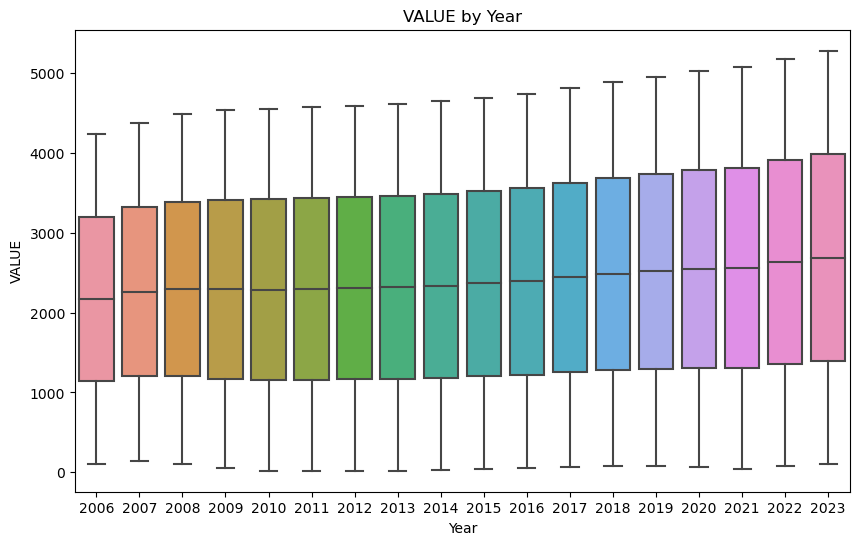

In [52]:
# Boxplot of 'VALUE' for each Year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='VALUE', data=df)
plt.title('VALUE by Year')
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.show()

In [67]:
# Wanted to make the same chart but Interactive 

fig = px.box(df, x='Year', y='VALUE', title='VALUE by Year',
             labels={'VALUE': 'Value', 'Year': 'Year'})

fig.show()

# I got this idea example from https://plotly.com/python/plotly-express/

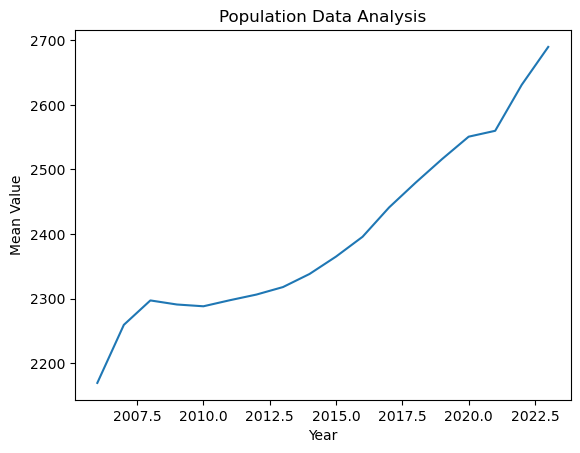

In [71]:
# Group the data by the Year column and calculate the mean of the VALUE column
grouped = df.groupby('Year')['VALUE'].mean()

# Plot the resulting data using a line chart
plt.plot(grouped.index, grouped.values)
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Population Data Analysis')
plt.show()

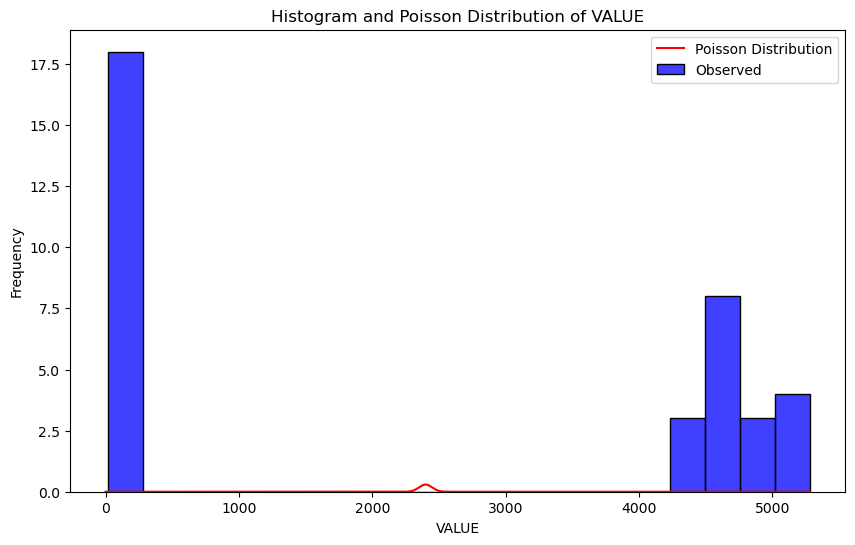

In [76]:
# Plot the histogram of 'VALUE'
plt.figure(figsize=(10, 6))
sns.histplot(df['VALUE'], bins=20, kde=False, color='blue', label='Observed')

# Fit a Poisson distribution to the data
lambda_param = df['VALUE'].mean()  # Using the mean as the parameter for Poisson
poisson_dist = poisson(mu=lambda_param)
x = np.arange(0, df['VALUE'].max() + 1)
plt.plot(x, poisson_dist.pmf(x) * len(df), 'r-', label='Poisson Distribution')

plt.title('Histogram and Poisson Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

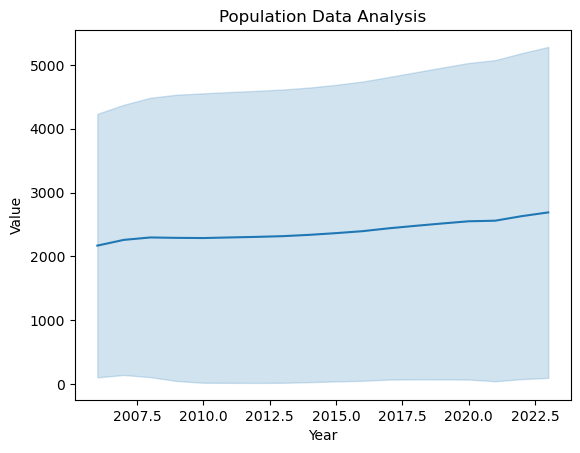

In [48]:
# Visualize the data using various plots and graphs
sns.lineplot(x='Year', y='VALUE', data=df)   ## Este si
plt.title('Population Data Analysis')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

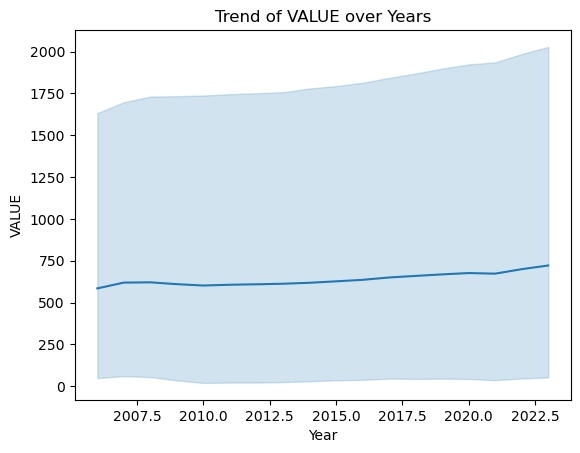

In [47]:
# Explore trends over years
sns.lineplot(x='Year', y='VALUE', data=df)
plt.title('Trend of VALUE over Years')
plt.show()

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:

# Data Normalization using Min-Max scaling
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['VALUE']] = scaler.fit_transform(df[['VALUE']])

In [49]:
# Plot distribution of normalized 'VALUE'
sns.histplot(df_scaled['VALUE'], kde=True)
plt.title('Distribution of Normalized VALUE')
plt.show()


NameError: name 'df_scaled' is not defined

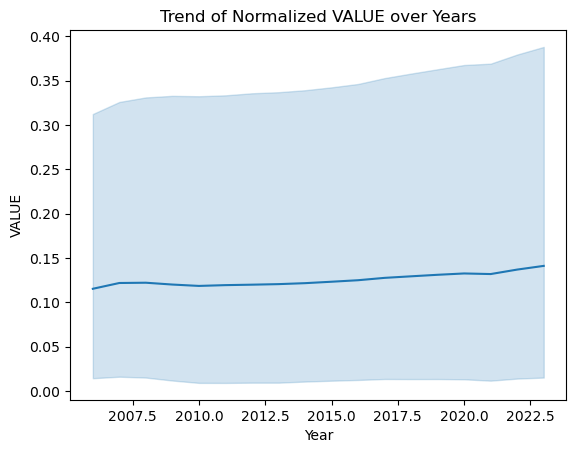

In [55]:
# Explore trends over years with normalized data
sns.lineplot(x='Year', y='VALUE', data=df_scaled)
plt.title('Trend of Normalized VALUE over Years')
plt.show()

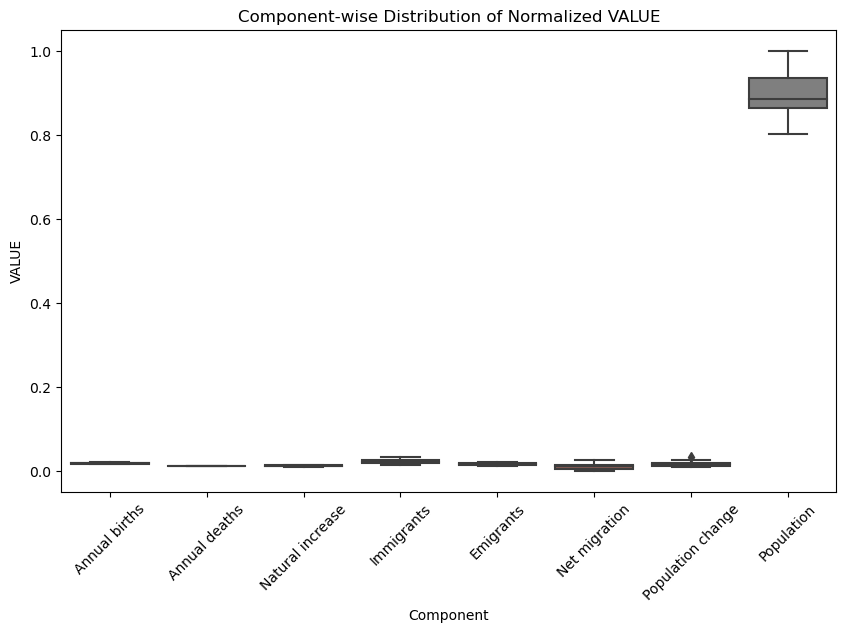

In [56]:

# Explore components and their normalized values
plt.figure(figsize=(10, 6))
sns.boxplot(x='Component', y='VALUE', data=df_scaled)
plt.title('Component-wise Distribution of Normalized VALUE')
plt.xticks(rotation=45)
plt.show()

C:\Users\AW\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


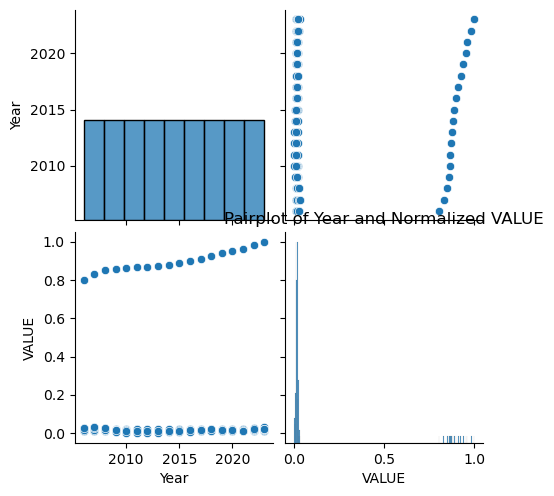

In [57]:
# Explore relationship between variables with normalized data
sns.pairplot(df_scaled[['Year', 'VALUE']])
plt.title('Pairplot of Year and Normalized VALUE')
plt.show()

C:\Users\AW\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


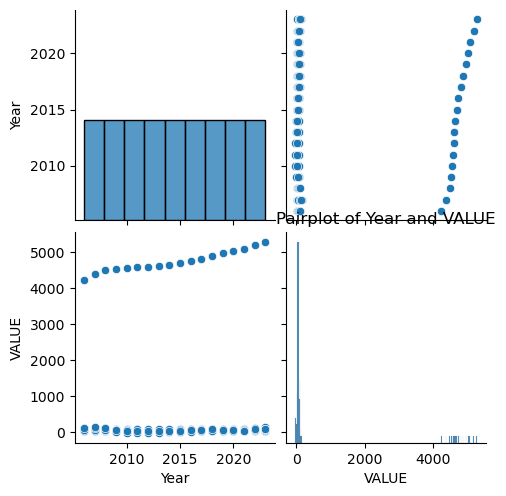

In [49]:
# Explore relationship between variables
sns.pairplot(df[['Year', 'VALUE']])
plt.title('Pairplot of Year and VALUE')
plt.show()

C:\Users\AW\AppData\Local\Temp\ipykernel_3380\3336568343.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='VALUE', data=df_filtered, estimator='mean', ci=None, marker='o', color='skyblue')


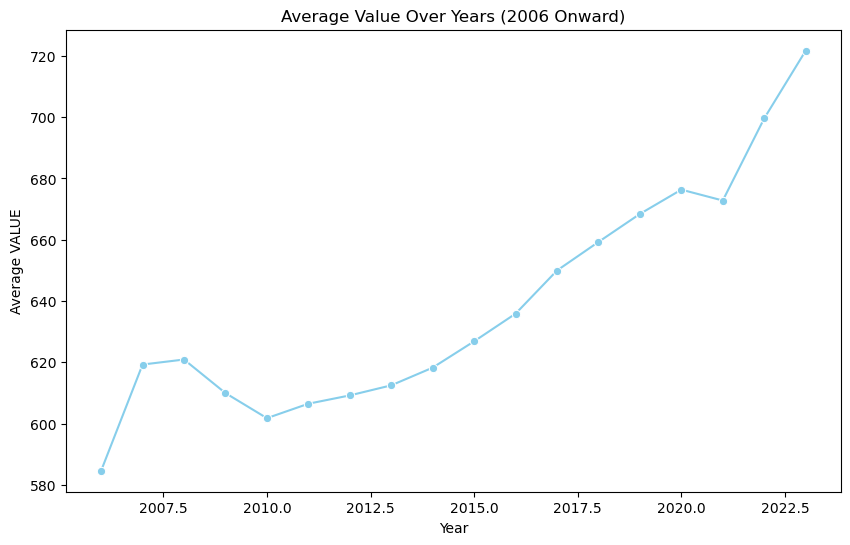

In [50]:
# Explore relationships between 'Year' and 'VALUE' using a lineplot
# Filter data for years 2006 and onwards
df_filtered = df[df['Year'] >= 2006]

# Explore relationships between 'Year' and 'VALUE' using a lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='VALUE', data=df_filtered, estimator='mean', ci=None, marker='o', color='skyblue')
plt.title('Average Value Over Years (2006 Onward)')
plt.xlabel('Year')
plt.ylabel('Average VALUE')
plt.show()

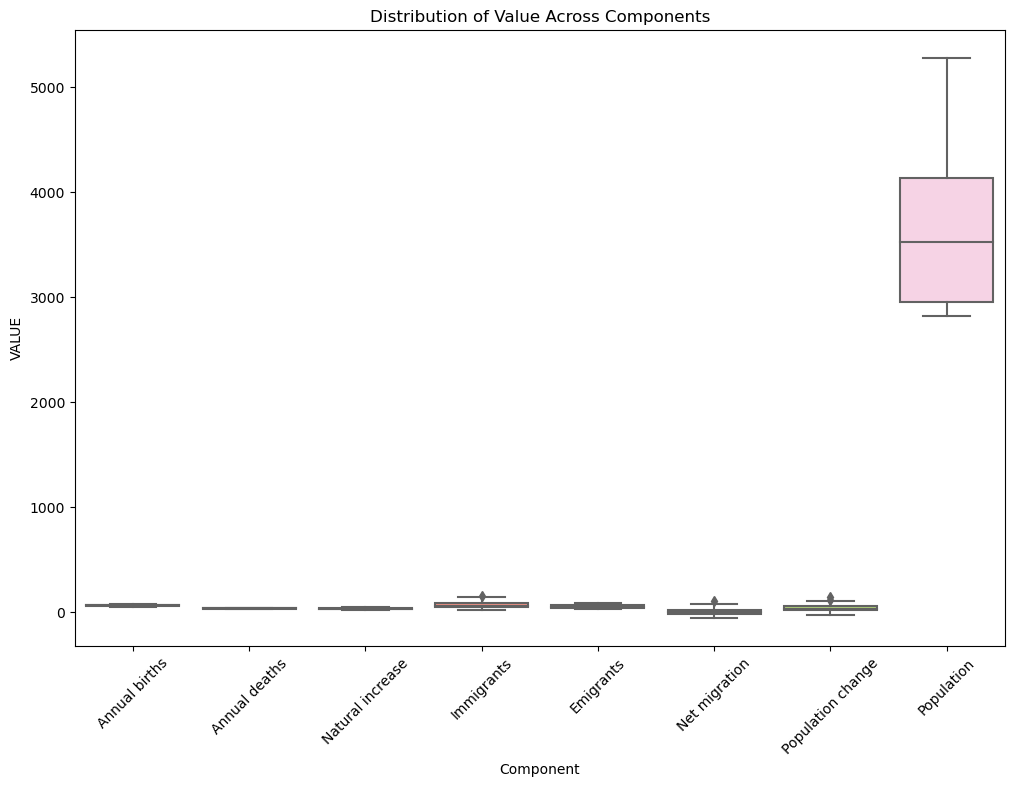

In [38]:
# Compare 'VALUE' across different 'Component' using a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Component', y='VALUE', data=df, palette='Set3')
plt.title('Distribution of Value Across Components')
plt.xlabel('Component')
plt.ylabel('VALUE')
plt.xticks(rotation=45)
plt.show()

## Compare the population by citizenship.

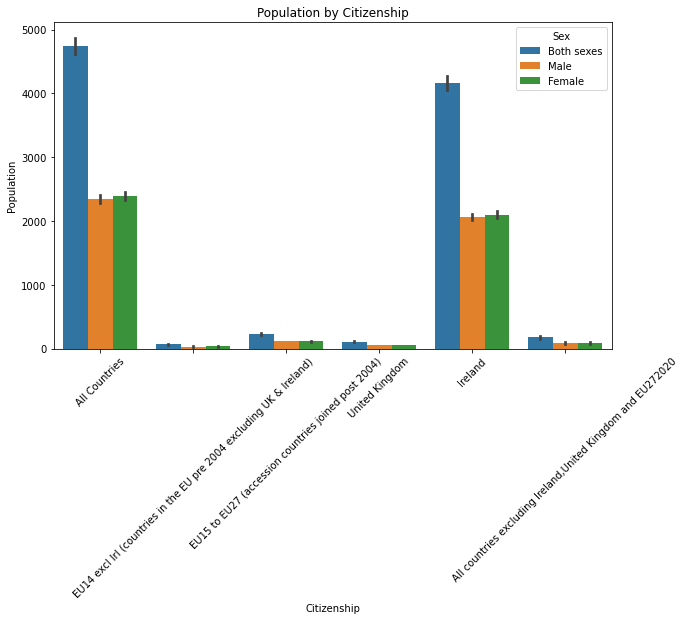

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x="Citizenship", y="VALUE", hue="Sex")
plt.title("Population by Citizenship")
plt.xlabel("Citizenship")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Examine the distribution of values (population) for different units.

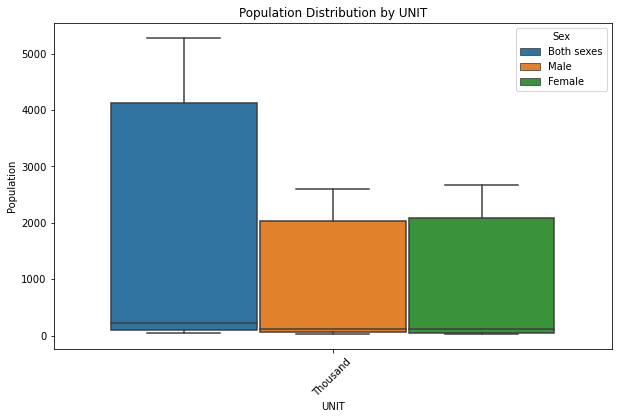

In [10]:
## Eliminarque edades hay mas, Eliminar ambos 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x="UNIT", y="VALUE", hue="Sex")
plt.title("Population Distribution by UNIT")
plt.xlabel("UNIT")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.legend(title="Sex")
plt.show()

## Here we explore relationships between numerical variables "Year" and "VALUE" by sex.

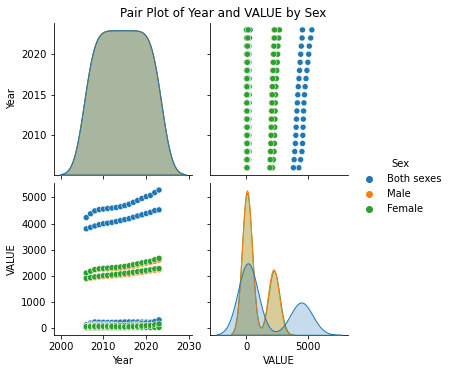

In [11]:
sns.pairplot(df2, hue="Sex", vars=["Year", "VALUE"])
plt.suptitle("Pair Plot of Year and VALUE by Sex", y=1.02)
plt.show()

## Here we visualize correlations between variables, "Year" and "VALUE."

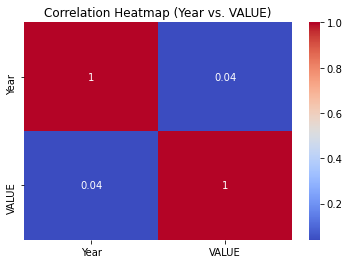

In [12]:
correlation_matrix = df2[["Year", "VALUE"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Year vs. VALUE)")
plt.show()